In [1]:
import os
os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
from keras.models import Sequential
import keras_tuner as kt
import pickle
from validate import plot_all_gamma_results
from process_data import visualize_snp_tensor


In [2]:
# load test data
test_in = pickle.load(open('../data/processed_data/const_demog/test/tensors','rb'))
test_out = pickle.load(open('../data/processed_data/const_demog/test/labels','rb'))

In [3]:
import numpy as np
# swap dim_1 and dim_2 in test_in
swapped_test_in = []
for tensor in test_in:
    swapped_tensor = np.stack((tensor[:,:,1], tensor[:,:,0]), axis=-1)
    swapped_test_in.append(swapped_tensor)
swapped_test_in = np.array(swapped_test_in)

In [4]:
# load trained model
model = tf.keras.saving.load_model('../results/const_demog_trained_300')

In [6]:
# verify that validation results is expected
# plot_all_gamma_results(model, test_in, test_out, '../results/plots/')

In [5]:
# load scramble data
scramble_data = pickle.load(open('../data/processed_data/const_demog/test/tensors_scramble','rb'))
free_scramble_data = pickle.load(open('../data/processed_data/const_demog/test/tensors_scramble_free','rb'))

In [12]:
# load partition data
partition_data = pickle.load(open('../data/processed_data/const_demog/test/tensors_partition','rb'))
partition_data_row = pickle.load(open('../data/processed_data/const_demog/test/tensors_partition_by_row','rb'))

In [13]:
# load test data from a different demography
test_in_two_epoch = pickle.load(open('../data/processed_data/two_epoch/test/tensors','rb'))
test_out_two_epoch = pickle.load(open('../data/processed_data/two_epoch/test/labels','rb'))

In [9]:
# load haperized data
haps_data_front = pickle.load(open('../data/processed_data/const_demog/test/tensors_haps_pad_front','rb'))
haps_data_back = pickle.load(open('../data/processed_data/const_demog/test/tensors_haps_pad_back','rb'))

In [10]:
# load haperized and scrambled freely data
haps_pad_back_scramble_free = pickle.load(open('../data/processed_data/const_demog/test/tensors_haps_pad_back_scramble_free','rb'))

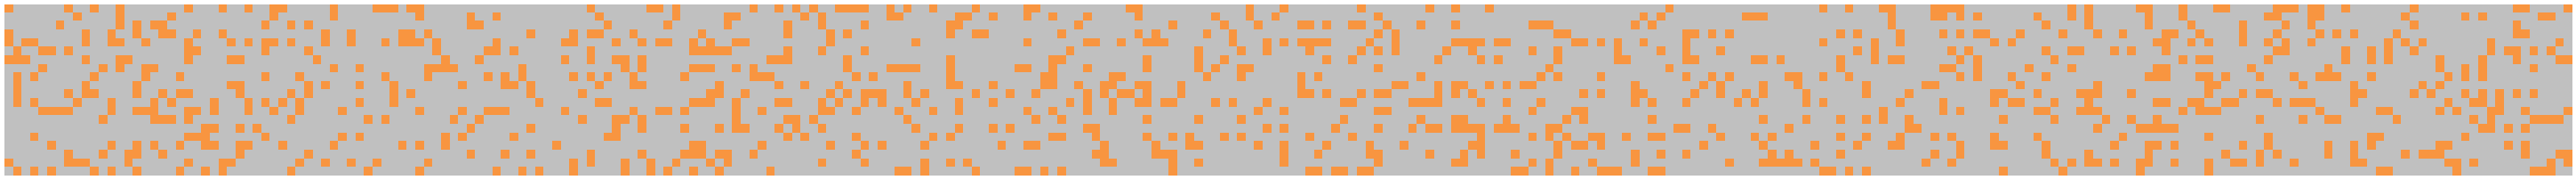

In [11]:
visualize_snp_tensor(haps_pad_back_scramble_free[0])

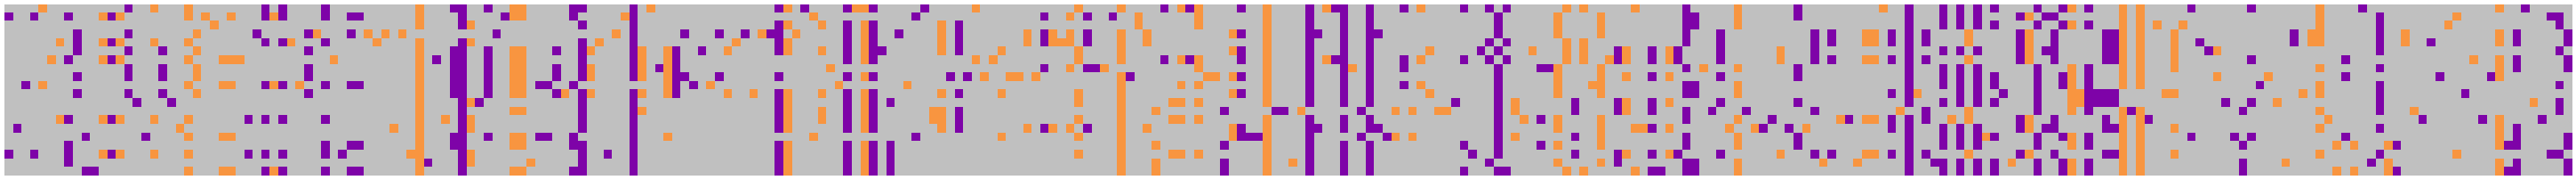

In [7]:
visualize_snp_tensor(test_in[0])

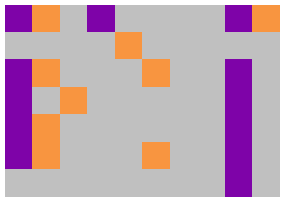

In [20]:
visualize_snp_tensor(test_in[0][:7,90:100])

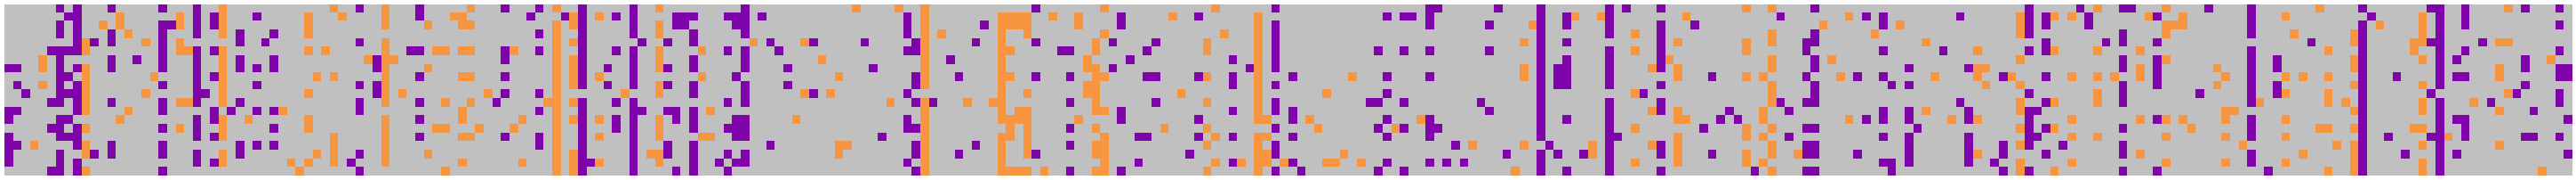

In [8]:
visualize_snp_tensor(scramble_data[0])

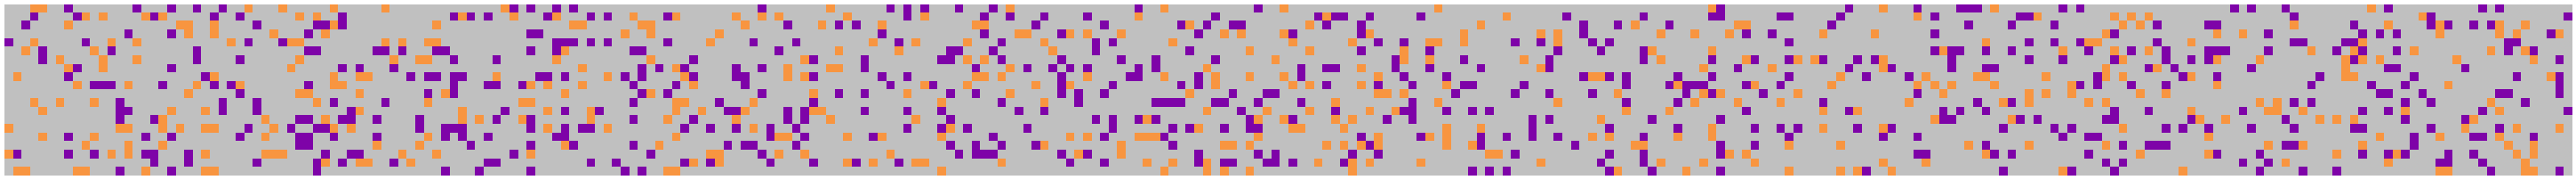

In [14]:
visualize_snp_tensor(free_scramble_data[0])

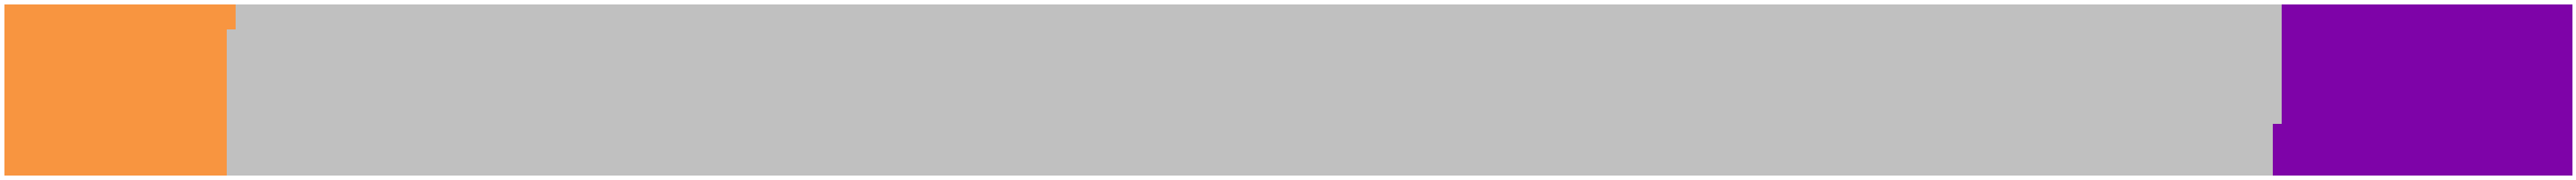

In [15]:
visualize_snp_tensor(partition_data[0])

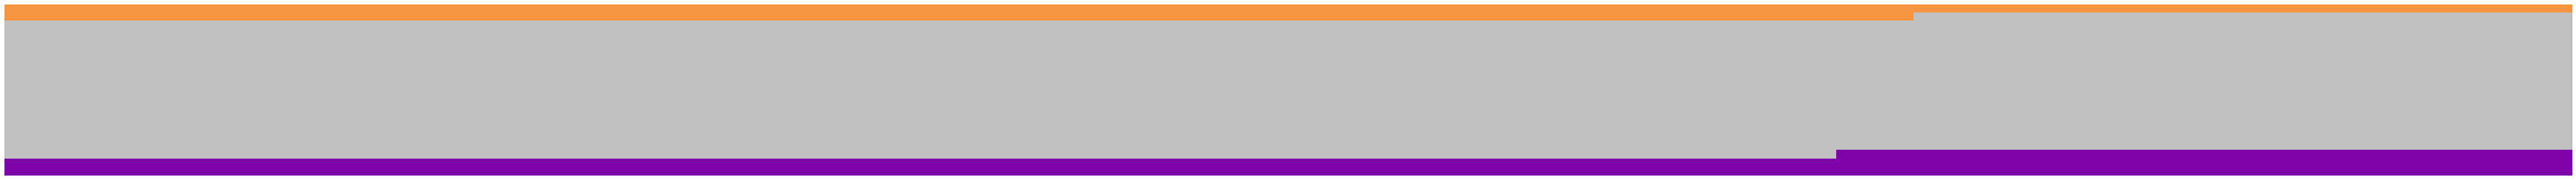

In [16]:
visualize_snp_tensor(partition_data_row[0])

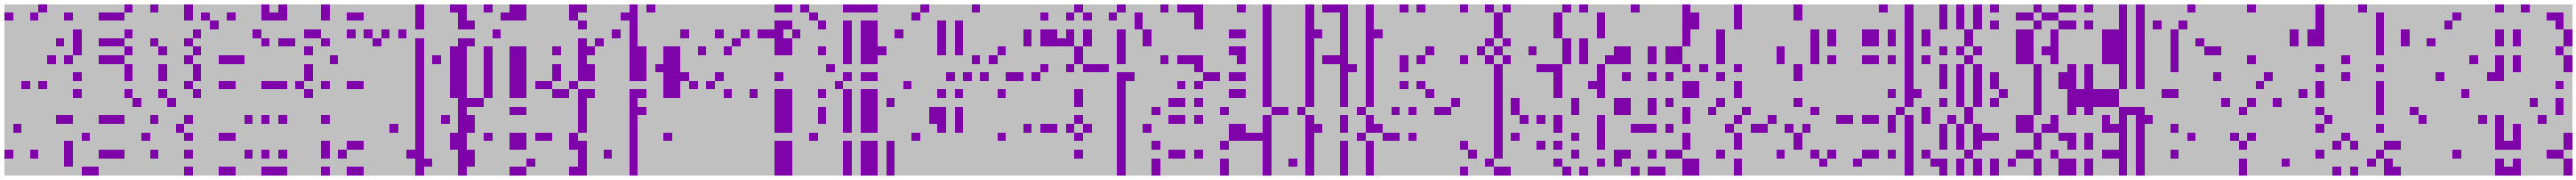

In [17]:
visualize_snp_tensor(haps_data_front[0])

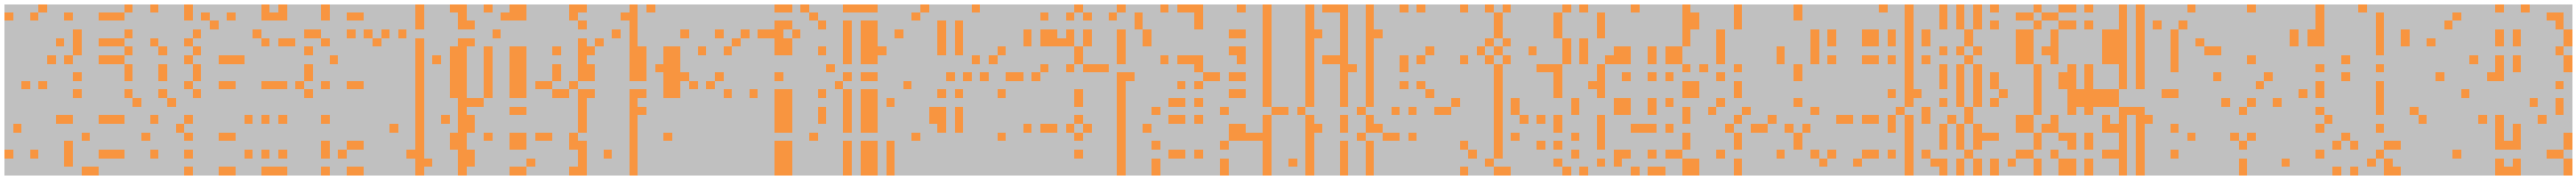

In [18]:
visualize_snp_tensor(haps_data_back[0])

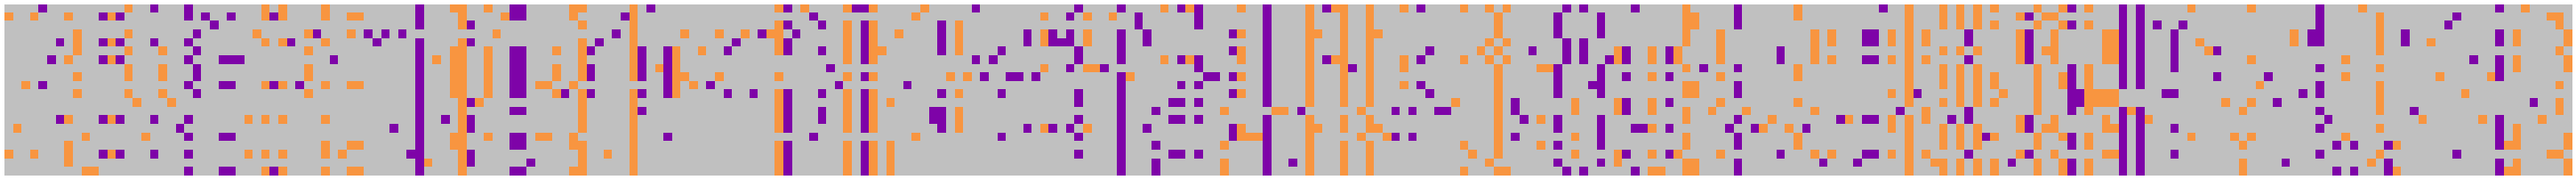

In [19]:
visualize_snp_tensor(swapped_test_in[0])

8/8 [==============================] - 4s 21ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

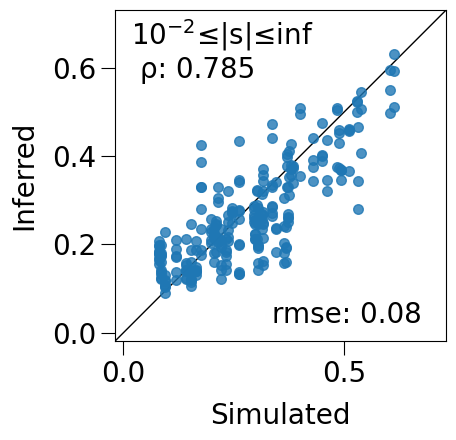

In [5]:
# plot prediction results on scramble data

plot_all_gamma_results(model, scramble_data, test_out, '../results/plots/test_const_demog_scramble')

8/8 [==============================] - 0s 38ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

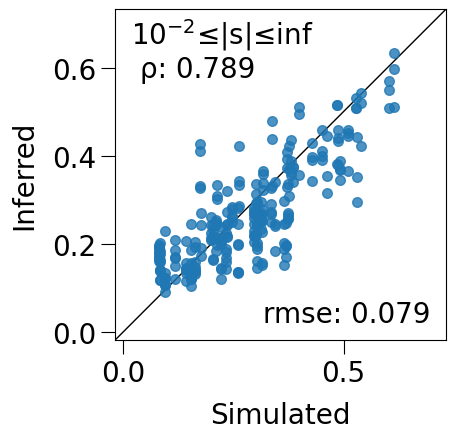

In [7]:
plot_all_gamma_results(model, free_scramble_data, test_out, '../results/plots/test_const_demog_free_scramble')

8/8 [==============================] - 0s 29ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

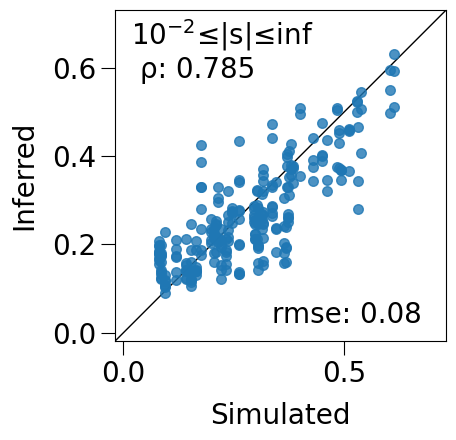

In [11]:
# plot prediction results on partition data

plot_all_gamma_results(model, scramble_data, test_out, '../results/plots/test_const_demog_partition')

8/8 [==============================] - 0s 56ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

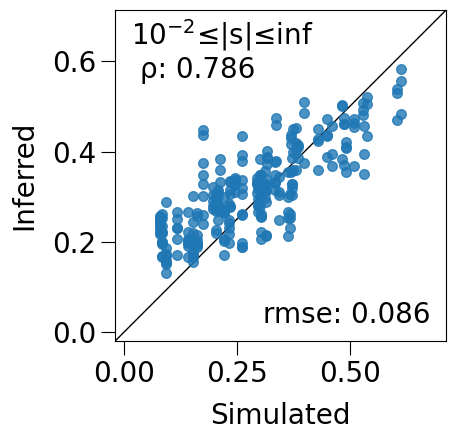

In [13]:
# plot prediction results on partition data by row

plot_all_gamma_results(model, partition_data_row, test_out, '../results/plots/test_const_demog_partition_row')

10/10 [==============================] - 0s 43ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

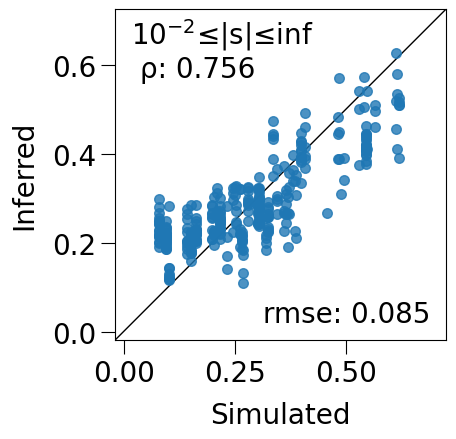

In [13]:
# plot accuracies on test data from a different demography
plot_all_gamma_results(model, test_in_two_epoch, test_out_two_epoch, '../results/plots/test_const_demog_on_two_epoch')

8/8 [==============================] - 16s 26ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

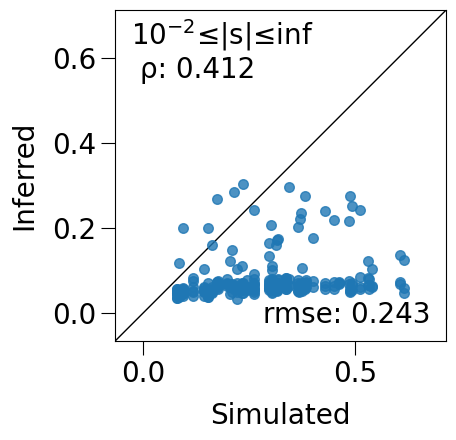

In [18]:
# plot accuracies on test data that is just haps
plot_all_gamma_results(model, haps_data_back, test_out, '../results/plots/test_const_demog_haps_pad_back')

8/8 [==============================] - 0s 21ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

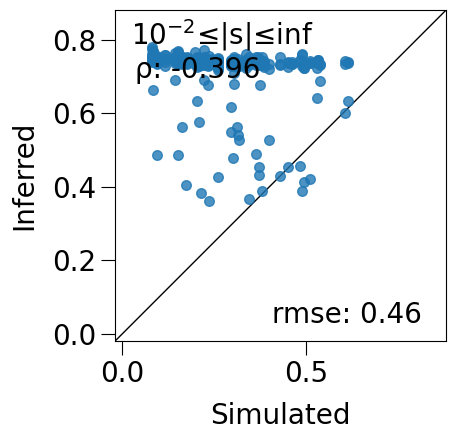

In [39]:
# plot accuracies on test data that is just haps (pad 0 to front)
plot_all_gamma_results(model, haps_data_front, test_out, '../results/plots/test_const_demog_haps_pad_front')

8/8 [==============================] - 0s 5ms/step


/mnt/c/Users/Linh/OneDrive/projects/dfe-cnn/modules/validate.py:133: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

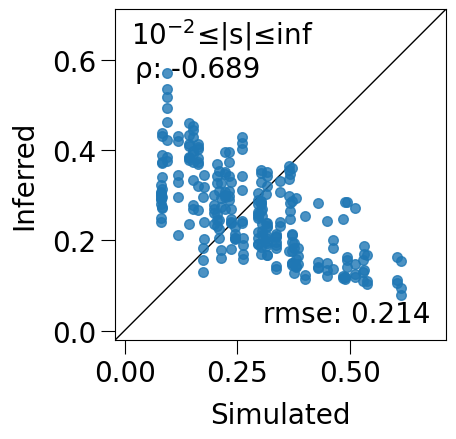

In [42]:
plot_all_gamma_results(model, swapped_test_in, test_out, '../results/plots/test_const_demog_swapped_dim')